In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df_unseen_model = pd.read_csv('../unseen_species_model/results/estimations.csv')
df_unseen_model = df_unseen_model[df_unseen_model['decade']<=1880]

df_score_region = pd.read_csv('../immaterial_index/results/df_region_score.csv', index_col=[0])
df_score_region = df_score_region.rename(columns = {'region_name':'region'})

new_df = pd.merge(df_unseen_model, df_score_region, on = ['decade', 'region'])
new_df = new_df.rename(columns = {'region':'region_name', 'decade':'year'})




In [2]:

lowess_span = 0.05
import matplotlib.ticker as ticker



def plot_trend(decades, scores, N_est, lower, upper, color="C0", label=None, ax=None, logy=False, figsize=None, lowess = True):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    
    if lowess:
        
            # Add LOWESS regression lines
        lowess_scores = sm.nonparametric.lowess(scores, decades, frac=lowess_span)
        ax.plot(decades, lowess_scores[:, 1], color='black', label='Raw index')

        lowess_lower = sm.nonparametric.lowess(lower, decades, frac=lowess_span)
        lowess_upper = sm.nonparametric.lowess(upper, decades, frac=lowess_span)

        lowess_N_est = sm.nonparametric.lowess(N_est, decades, frac=lowess_span)
        ax.plot(decades, lowess_N_est[:, 1], color="C0", label='Raw index corrected by the unseen-species model')

        ax.fill_between(decades, lowess_lower[:, 1], lowess_upper[:, 1], alpha=0.4, color=color)

    else:
        # Plot predicted line
        ax.plot(decades, N_est, color=color, label='Estimated diversity')
        ax.plot(decades, scores, color='black', label='Raw index')

    # Plot credibility bands
        #ax.fill_between(decades, lower, upper, alpha=0.4, color=color)

    ax.set(xlabel="time", ylabel="Number of CPs")
    if logy:
        ax.set_yscale("log")
        ax.set(xlabel="time", ylabel="Log Number of CPs")

    ax.set_title(label)
    ax.legend()

    return ax



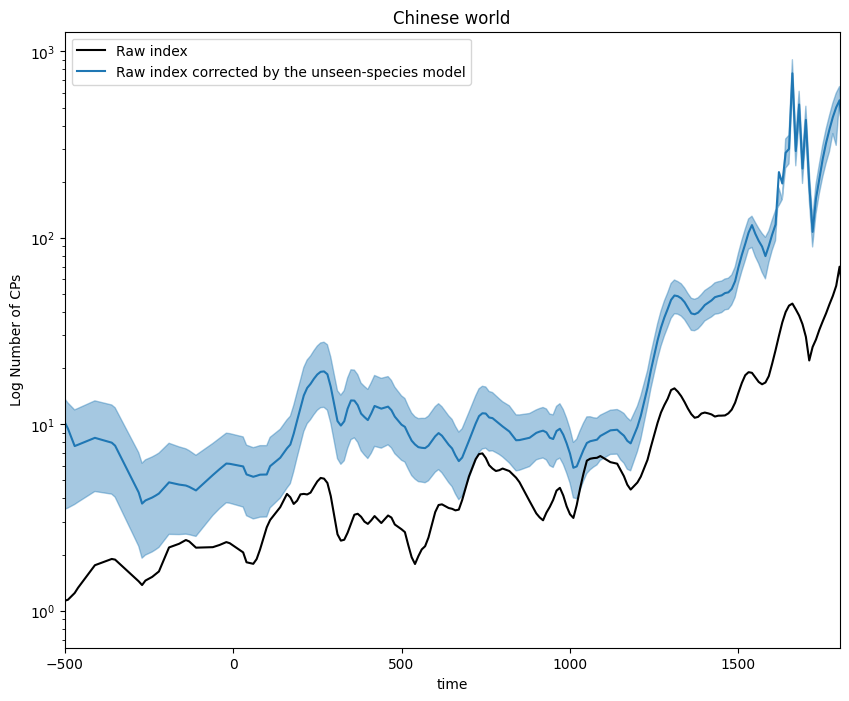

In [3]:
region = 'Chinese world'

df = new_df[new_df['region_name']==region]

N_est = list(df['N_est'])
lower = list(df['lower'])
upper = list(df['upper'])
decades = list(df['year'])
scores = list(df['score'])

ax = plot_trend(decades, scores, N_est, lower, upper, label=region, logy = True, lowess = True, figsize=(10,8))
ax.set_xlim(-500, 1800)

#plt.savefig("figures/example_unseen_species.png", dpi=300)

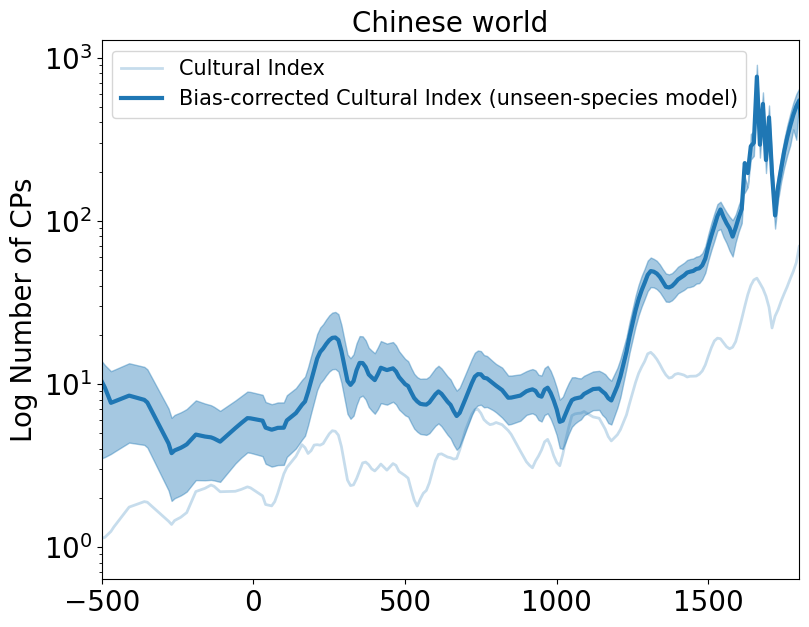

In [21]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import matplotlib.ticker as ticker

lowess_span = 0.05  # Set the span for LOWESS smoothing

def plot_trend(decades, scores, N_est, lower, upper, color="C0", label=None, ax=None, logy=False, figsize=(9, 7), lowess=True):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    if lowess:
        # Calculate LOWESS regression
        lowess_scores = sm.nonparametric.lowess(scores, decades, frac=lowess_span)
        ax.plot(decades, lowess_scores[:, 1], color=color, label='Cultural Index', linewidth=2, alpha=0.25)
        lowess_lower = sm.nonparametric.lowess(lower, decades, frac=lowess_span)
        lowess_upper = sm.nonparametric.lowess(upper, decades, frac=lowess_span)
        
        # Plotting the estimated line from LOWESS
        lowess_N_est = sm.nonparametric.lowess(N_est, decades, frac=lowess_span)
        ax.plot(decades, lowess_N_est[:, 1], color="C0", label='Bias-corrected Cultural Index (unseen-species model)', linewidth=3)

        # Fill between for the confidence interval
        ax.fill_between(decades, lowess_lower[:, 1], lowess_upper[:, 1], alpha=0.4, color=color)
    else:
        # Plot raw and estimated lines without LOWESS
        ax.plot(decades, scores, color='black', label='Raw index')
        ax.plot(decades, N_est, color=color, label='Estimated diversity')

    # Set the axis labels and title
    ax.set_xlabel("", fontsize=20)
    ax.set_ylabel("Number of CPs", fontsize=20)
    if logy:
        ax.set_yscale("log")
        ax.set_ylabel("Log Number of CPs", fontsize=20)

    # Customize ticks
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    # Set title and legend
    ax.set_title(label, fontsize=20)
    ax.legend(fontsize=15)

    # Remove grid
    ax.grid(False)

    return ax
ax = plot_trend(decades, scores, N_est, lower, upper, label=region, logy = True, lowess = True)
ax.set_xlim(-500, 1800)
plt.savefig("figures/unseen_species_model/example_unseen_species.png", dpi=300)


(-500.0, 1800.0)

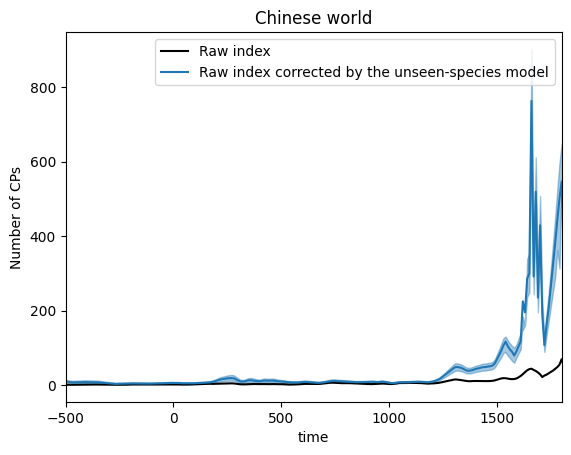